## Time Series Data in Python: Data Stationarity #

# 1. The Visual Test
- Before running statistical tests, always plot your data. A non-stationary series usually exhibits a visible trend (upward/downward slope) or heteroscedasticity (the "fan" effect where variance increases over time).

# 2. Statistical Testing (ADF Test)
- The Augmented Dickey-Fuller (ADF) test is the standard tool.

- Null Hypothesis (H0): The series is non-stationary.
- Alternate Hypothesis (H1): The series is stationary.
- Goal: A p-value < 0.05 to reject the null hypothesis.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# 1. Generate Non-Stationary Data (Trend + Noise)
np.random.seed(42)
data = np.cumsum(np.random.randn(100) + 0.5) 
df = pd.DataFrame(data, columns=['value'])

print("--- Testing Original Data ---")

#2. Perform ADF Test
def perform_adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    if result[1] <= 0.05:
        print("Conclusion: Stationary (Reject H0)")
    else:
        print("Conclusion: Non-Stationary (Fail to reject H0)")

# Example: Testing raw data
perform_adf_test(df['value'])

--- Testing Original Data ---
ADF Statistic: 0.1641
p-value: 0.9702
Conclusion: Non-Stationary (Fail to reject H0)


# 3. Transformations for Non-Stationary Data
- If your test results come back as "Non-Stationary," you must apply transformations.

**A. Log Transformation (To stabilize Variance)**

- If the "swings" in your data get larger as time goes on, a log transform can compress that variance.

In [ ]:
# Apply log transform
df['value_log'] = np.log(df['value'])

**B. Differencing (To remove Trend)**

- This is the most common fix. Instead of modeling the absolute values, you model the change between time steps.

In [ ]:
# First-order differencing
df['value_diff'] = df['value'].diff()

# If the data has seasonality (e.g., monthly), use seasonal differencing
# df['seasonal_diff'] = df['value'].diff(12)

# 4. Complete Workflow

--- Testing Original Data ---
ADF Statistic: 0.1641
p-value: 0.9702
Conclusion: Non-Stationary (Fail to reject H0)

--- Testing Differenced Data ---
ADF Statistic: -10.0089
p-value: 0.0000
Conclusion: Stationary (Reject H0)


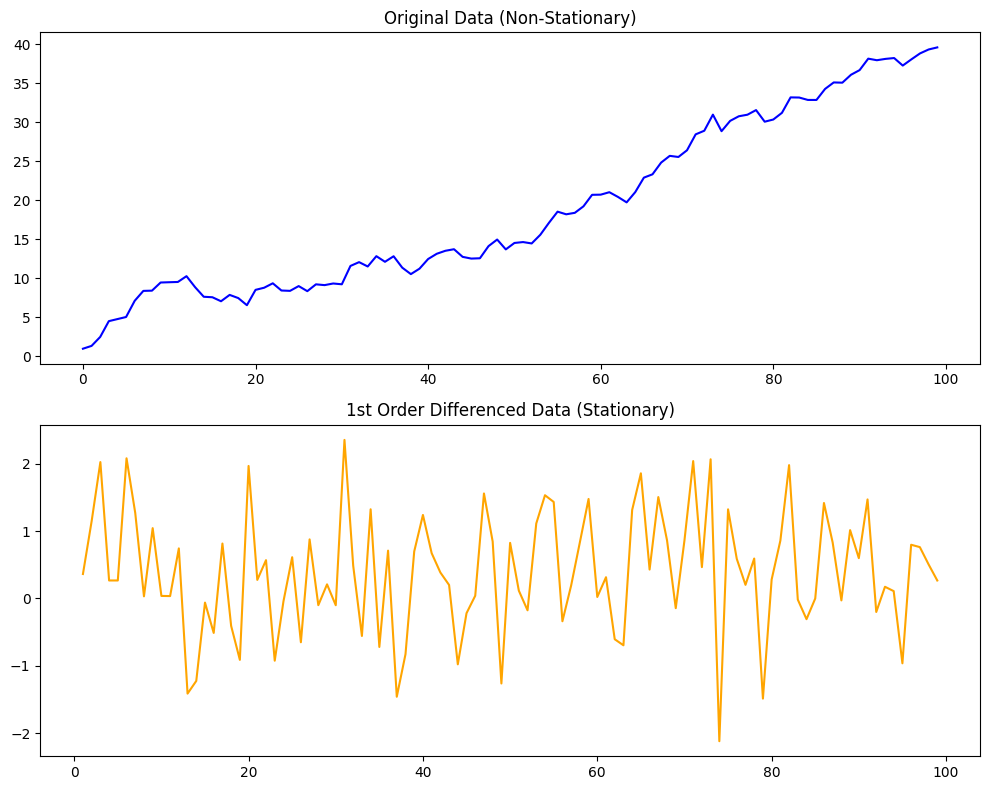

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

# 1. Generate Non-Stationary Data (Trend + Noise)
np.random.seed(42)
data = np.cumsum(np.random.randn(100) + 0.5) 
df = pd.DataFrame(data, columns=['value'])

print("--- Testing Original Data ---")
perform_adf_test(df['value'])

# 2. Apply Transformation: Differencing
df['diff_1'] = df['value'].diff()

print("\n--- Testing Differenced Data ---")
# Drop the first NaN created by differencing
perform_adf_test(df['diff_1'].dropna())

# 3. Plot Comparison
plt.figure(figsize=(10, 8))

# Subplot 1: Original Data
plt.subplot(2, 1, 1)
plt.plot(df['value'], color='blue') 
plt.title("Original Data (Non-Stationary)") 

# Subplot 2: Differenced Data
plt.subplot(2, 1, 2)
plt.plot(df['diff_1'], color='orange')
plt.title("1st Order Differenced Data (Stationary)")

plt.tight_layout()
plt.show()